# Baseline Titanic challenge Solution

### Data Description
The titanic challenge is a challenge on the predominant titanic event that took place years ago at where we had alot of people on a ship. Unfortunately, the ship collided with an iceberg which led to the sinking of the ship and loss of so many lives. 
This challenge is therefore put forth from the details gotten regarding people on the ship who survived and those who didnt. The challenge is all about you (the data scienctist)  build a predictive model which is able to determine peoples survival. 
### The Data Set
The data set is avaliable on kaggle and can be accessed using the link below:
https://www.kaggle.com/c/titanic

### Data description
    from the dataset we do have the following information stated regarding each fellow on the ship:
    *passenger_id
    *pclass
    *name
    *sex
    *age
    *sibsp
    *parch
    *ticket
    *fare
    *cabin
    *embarked
  
    
the bone of contention is to forecast the survival of a person given the details above.

    Survival in this case can be represented in binary:
    *one (1) means 'will survive'.
    *zero (0) means 'will not survive'.
    
Let's get to coding. Let's begin by importing the necessary libaries that are relevant to modelling this problem and solving it.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os, sys
import warnings
warnings.filterwarnings('ignore')


let's read in the data using pandas method called read_csv for reading in, csv files.

In [2]:
train = pd.read_csv('train.csv')

test= pd.read_csv('test.csv')
train.shape, test.shape

((891, 12), (418, 11))

let's take a look at the first 5 entries of our data just to have grasp of how our data looks like.

In [3]:
data = train.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking the dimension of the data we have

In [4]:
# to know the dimension of my data
data.shape

(891, 12)

# filling NAN, an removing rough columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Cabin

In [6]:
data = data.drop(['Cabin'], axis = 1)
#test_data = data.drop(['cabin'], axis = 1)

In [7]:
test = test.drop(['Cabin'], axis =1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Age

In [9]:
data['Age'].mode()

0    24.0
dtype: float64

In [10]:
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])
test['Age'] = test['Age'].fillna(test['Age'].mode()[0])

In [11]:
data['Age'].min(), data['Age'].max()

(0.42, 80.0)

### Binning Age



In [12]:
def bin_age(data, min_val, max_val, range_val):
    data_copy = data.copy()
    range_of_vals = int(max_val+1 - min_val)
    batch_value = int(range_of_vals/range_val)
    dict_batch = {}
    start, stop = 0,0
    for i,j in enumerate(range(0,range_of_vals, batch_value)):
        stop = start + batch_value
        dict_batch[str(i)] = (start,stop)
        start = stop
        
        if stop <= range_of_vals:
            pass
        else:
            start = stop - batch_value
            stop = int(max_val) + 1
            
            dict_batch[str(i)] = (start,stop)
    print(dict_batch)       
    bin_out = []       
    for k in data_copy:
        out = [i for i,(start,stop) in zip(dict_batch.keys(), dict_batch.values()) if int(k) in range(start,stop)]
        #print(k,out)
        bin_out.append(int(out[0]))
    return bin_out


age_out = bin_age(data['Age'],0.42,81.0,5)

{'0': (0, 16), '1': (16, 32), '2': (32, 48), '3': (48, 64), '4': (64, 80), '5': (80, 82)}


In [13]:
test['Age'] = bin_age(test['Age'], 0.42, 81.0, 5)

{'0': (0, 16), '1': (16, 32), '2': (32, 48), '3': (48, 64), '4': (64, 80), '5': (80, 82)}


In [14]:
train_da = data.copy()
train_da['Age_bin'] = age_out

In [15]:
train_da.shape

(891, 12)

In [16]:
np.unique(train_da['Age_bin'])

array([0, 1, 2, 3, 4, 5])

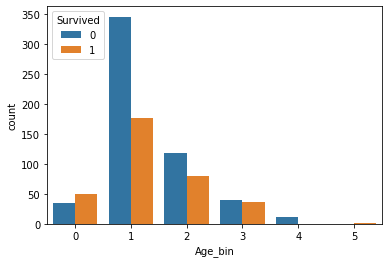

In [17]:

sns.countplot(x = 'Age_bin', hue = 'Survived', data = train_da)

In [18]:
700/891

0.7856341189674523

on binning Age into a new column called Age_bin, we figured
out that bin 1 and 2 takes almost 750 of the whole data. Now if we label encode the data such that all data points within 700 are giving more priority than the others, that implies
we are giving the computer easy understanding to predict at least 78.5% of the data (swift pattern). So now can how our age to be transformed into binaries. What we are basically trying to do is to figure out age ranges who survived (bin 1 and 2) and then give them more priority/ chances of survival as long as they are within that age range.

As soon as we build our model, our baseline model can't be less than 78.5%. Let's see how we can intuitively improve the model with some other forms of intuition below.

In [19]:
def tarn(k):
    f = 0
    if k == 0:
        f = 0
    elif k == 1:
        f = 1
    
    elif k == 2:
        f = 1
    elif k == 3:
        f = 0
    elif k == 4:
        f = 0
    else:
        f = 0
    return f

train_da['Age_bin'] = train_da['Age_bin'].apply(tarn)

In [20]:
test['Age'] = test['Age'].apply(tarn)

In [21]:
np.unique(test['Age'])

array([0, 1])

In [22]:
np.unique(train_da['Age_bin'])

array([0, 1])

In [23]:
train_da['Age_bin'].value_counts()

1    719
0    172
Name: Age_bin, dtype: int64

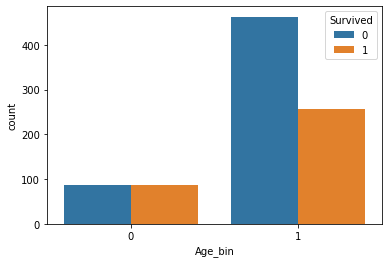

In [24]:
sns.countplot(x = 'Age_bin', hue = 'Survived', data = train_da)

from the image above, we can accurately predict 700 (survived and not-survived)
if they belong to class 1, if not

In [25]:
data = train_da.copy()

In [26]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

In [27]:
data = data.drop('Age', axis= 1)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Age_bin        891 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [29]:
test['Age_bin'] = test['Age']
test = test.drop('Age', axis = 1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
Age_bin        418 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 32.8+ KB


In [30]:
test.shape, data.shape

((418, 10), (891, 11))

In [31]:
data.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age_bin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208,0.806958
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429,0.394907
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200,1.000000


## Embarked

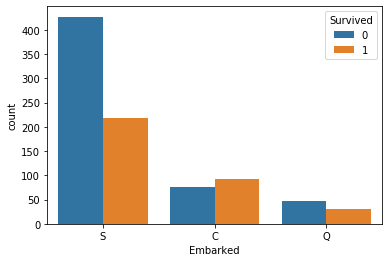

In [32]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = data)

In [33]:
np.unique(data['Embarked'])

array(['C', 'Q', 'S'], dtype=object)

In [34]:
data['Embarked'][data['Embarked'] == 'S'] = 0
data['Embarked'][data['Embarked'] == 'Q'] = 1
data['Embarked'][data['Embarked'] == 'C'] = 1

In [35]:
test['Embarked'][test['Embarked'] == 'S'] = 0
test['Embarked'][test['Embarked'] == 'Q'] = 1
test['Embarked'][test['Embarked'] == 'C'] = 1

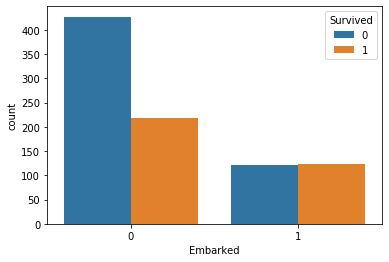

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'Embarked', hue = 'Survived', data = data)

In [37]:
data['Embarked'] = data['Embarked'].astype('int')
test['Embarked'] = test['Embarked'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null int64
Age_bin        891 non-null int64
dtypes: float64(1), int64(7), object(3)
memory usage: 76.7+ KB


# Encodings

In [38]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Age_bin'],
      dtype='object')

In [39]:
data_names = data['Name']
data = data.drop('Name', axis = 1)
test = test.drop('Name', axis = 1)

data_id = data['PassengerId']
data = data.drop('PassengerId', axis = 1)
test_id = test['PassengerId']
test = test.drop('PassengerId', axis = 1)

# PClass

In [40]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

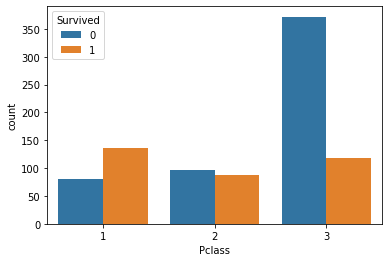

In [41]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = data)

In [42]:
data['Pclass'][data['Pclass']  == 3] = 0
data['Pclass'][data['Pclass']  == 2] = 1
data['Pclass'][data['Pclass']  == 1] = 1

data['Pclass'] = data['Pclass'] .astype(int)

test['Pclass'][test['Pclass']  == 3] = 0
test['Pclass'][test['Pclass']  == 2] = 1
test['Pclass'][test['Pclass']  == 1] = 1

test['Pclass'] = test['Pclass'] .astype(int)

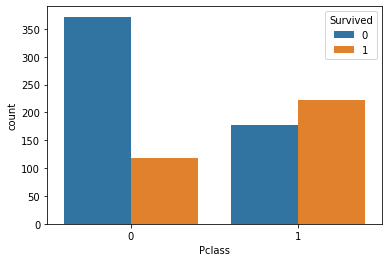

In [43]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = data)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null int64
Age_bin     891 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 62.8+ KB


# SibSp

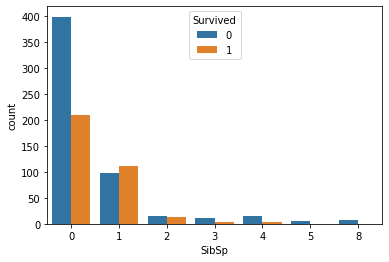

In [45]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = data)

In [46]:
def enco(data):
    if data == 0:
        out = 0
    elif data == 1:
        out = 0
    else:
        out = 1
    return out
data['SibSp'] = data['SibSp'].apply(enco)

test['SibSp'] = test['SibSp'].apply(enco)

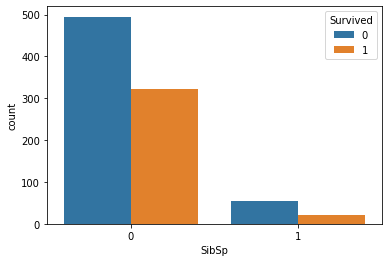

In [47]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = data)

In [48]:
data = data.drop('Ticket', axis = 1)
test = test.drop('Ticket', axis = 1)
data = pd.get_dummies(data, columns = ['Sex', 'Age_bin'])
test = pd.get_dummies(test, columns = ['Sex', 'Age_bin'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null int64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Age_bin_0     891 non-null uint8
Age_bin_1     891 non-null uint8
dtypes: float64(1), int64(5), uint8(4)
memory usage: 45.4 KB


## Parch

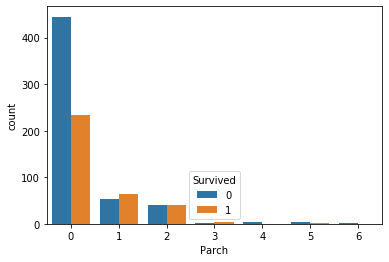

In [49]:
sns.countplot(x = 'Parch', hue = 'Survived', data = data)

In [50]:
def parch_enco(data):
    if data == 0:
        out = 0
    else:
        out = 1
    return out
data['Parch'] = data['Parch'].apply(parch_enco)

test['Parch'] = test['Parch'].apply(parch_enco)

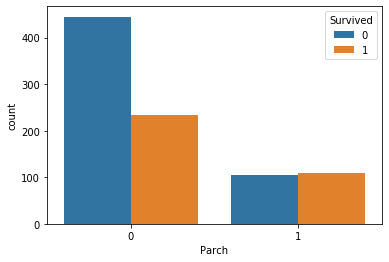

In [51]:
sns.countplot(x = 'Parch', hue = 'Survived', data = data)

# fare

In [52]:
data['Fare'].mode()[0]

8.05

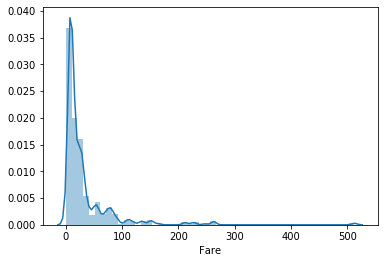

In [53]:
sns.distplot(data['Fare'])

In [54]:
def fare_bin(x):
    out = 0
    if x > 0 and x<= 80:
        out = 0
    else:
        out = 1
    return out
data['Fare'] = data['Fare'].apply(fare_bin)
test['Fare'] = test['Fare'].apply(fare_bin)
data['Fare'] = data['Fare'].astype(int)
test['Fare'] = test['Fare'].astype(int)

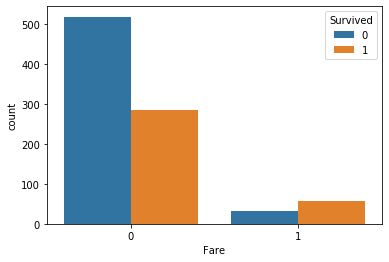

In [55]:
sns.countplot(x = 'Fare', hue = 'Survived', data = data)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null int64
Embarked      891 non-null int64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Age_bin_0     891 non-null uint8
Age_bin_1     891 non-null uint8
dtypes: int64(6), uint8(4)
memory usage: 45.4 KB


In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass        418 non-null int64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null int64
Embarked      418 non-null int64
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Age_bin_0     418 non-null uint8
Age_bin_1     418 non-null uint8
dtypes: int64(5), uint8(4)
memory usage: 18.1 KB


In [58]:
data.shape, test.shape

((891, 10), (418, 9))

# modelling

In [59]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [60]:
y = data['Survived']
x = data.drop('Survived', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)


In [61]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)

0.7949438202247191

In [62]:
rand = RandomForestClassifier()
rand.fit(x_train, y_train)
rand.score(x_train, y_train)

0.8328651685393258

In [63]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
pred = rand.predict(x_test)
accuracy_score(y_test, pred)

0.7988826815642458

In [64]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
rand_pred = rand.predict(x_test)
accuracy_score(rand_pred, y_test)

0.7988826815642458

In [65]:
f1_score(rand_pred, y_test)

0.7464788732394366

In [66]:
#grad_pred = grad.predict(x_test)
#accuracy_score(grad_pred, y_test)

In [67]:
#f1_score(grad_pred, y_test)

In [68]:
pred = lr.predict(x_test)
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [69]:
#classification_report(grad_pred, y_test)

In [70]:
accuracy_score(pred, y_test)

0.7653631284916201

In [71]:
f1_score(pred, y_test)

0.7162162162162162

In [72]:
#test['Fare'].mode()

test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])

In [73]:
# 
model_xgb = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=50, max_depth=5)

    
model = model_xgb.fit(x_train, y_train)
y_pred = model_xgb.predict(x_test)
print('train score: ', model_xgb.score(x_train, y_train))
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))


train score:  0.8300561797752809
Final prediction score: [0.79329609]


In [74]:
model_grb = GradientBoostingClassifier(n_estimators = 60, max_depth = 7)
model = model_grb.fit(x_train, y_train)
y_pred = model_grb.predict(x_test)
print('train score: ', model_grb.score(x_train, y_train))
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))


train score:  0.8328651685393258
Final prediction score: [0.80446927]


In [75]:
model_rand = RandomForestClassifier(n_estimators = 50, max_depth = 10)
model = model_rand.fit(x_train, y_train)
y_pred = model_rand.predict(x_test)
print('train score: ', model_rand.score(x_train, y_train))
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))


train score:  0.8328651685393258
Final prediction score: [0.79888268]


# my prediction

In [76]:
test.shape, x_train.shape

((418, 9), (712, 9))

In [77]:
prediction= model_grb.predict(test)

In [78]:
len(test_id), len(prediction)

(418, 418)

In [79]:
frame_dict = {}
frame_dict['PassengerId'] = test_id
frame_dict['Survived'] = prediction

In [80]:
frame = pd.DataFrame(frame_dict)
frame.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [81]:
frame.to_csv('my_submission6.csv', index = False)

# Neural Networks with Tensorflow

In [82]:
x_train.shape, y_train.shape

((712, 9), (712,))

In [83]:
def to_categorical(y):
    feed = {'y':y}
    frame = pd.DataFrame(feed)
    return pd.get_dummies(frame, columns = ['y'])

y_trial = to_categorical(y_train)
y_trial.shape

(712, 2)

In [84]:
import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

In [85]:
X = tf.placeholder(tf.float32, shape = (None, 9), name = 'x')
y = tf.placeholder(tf.float32, shape = (None,2), name = 'y')

batch_size = 100
n_batches = int(np.ceil(712/batch_size))

def fetch_batch(batch_index):
    if batch_index < n_batches-1:
        start = batch_index * batch_size
        stop = batch_size + start
        x_batch = x_train[start:stop]
        y_batch = y_train[start:stop]
        
    else:
        start = batch_index* batch_size
        x_batch = x_train[start:]
        y_batch = y_train[start:]
    return x_batch, y_batch

a,b = fetch_batch(7)

In [86]:
n_inputs = 9
h1 = 100
h2 = 300
n_output = 2

In [87]:
def neuron_layer(X, n_neurons, name, activation = None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2/ np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev = stddev)
        W = tf.Variable(init, name = 'weights')
        b = tf.Variable(tf.zeros([n_neurons]), name = 'biases')
        z = tf.matmul(X, W) + b
        
        if activation == 'relu':
            return tf.nn.relu(z)
        
        else:
            return z
        
with tf.name_scope('NeuralNet'):
    hidden1 = neuron_layer(X, h1, 'hidden1', activation = 'relu')
    hidden2 = neuron_layer(hidden1, h2, 'hidden2', activation = 'relu')
    logits = neuron_layer(hidden2, n_output, 'outputs')

    
with tf.name_scope('loss'):
    xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = 'loss')
    
    
learning_rate = 0.01

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
    training_op = optimizer.minimize(loss)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [88]:
with tf.name_scope('precision'):
    #fn, fp, tn, tp
    
    prediction = tf.argmax(logits, 1)
    actual = tf.argmax(y,1)
    
    TP = tf.math.count_nonzero(prediction * actual)
    TN = tf.math.count_nonzero((prediction - 1) * (actual - 1))
    FP = tf.math.count_nonzero(prediction * (actual - 1))
    FN = tf.math.count_nonzero((prediction - 1) * actual)
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1_Score = 2*(Recall * precision) / (Recall + precision)
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [89]:
def one_hot(y):
    frame = pd.DataFrame({'k':y.astype(np.float32)})
    return pd.get_dummies(frame, columns = ['k'])

y_t =  one_hot(y_train)
y_t.shape

(712, 2)

In [90]:
n_epochs = 20
batch_size = 50
with tf.Session() as sess:
    init.run()
    max_acc=0
    acc_going_down=0
    for epoch in range(n_epochs):
        batch_step=0
        avg_loss = 0
        total_loss= 0
        total_batch = int(x_train.shape[0]/batch_size)

        for batch_index in range(total_batch):
            x_batch, y_batch = fetch_batch(batch_index)
            _,l=sess.run([training_op,loss],feed_dict={X:x_batch, y:one_hot(y_batch)})
            batch_step+=1
            total_loss += l
        if((epoch)%10==0):
            avg_loss = total_loss/batch_size
            print("Epoch:", '%02d' % (epoch+1), "| Average Training Loss= {:.2f}".format(avg_loss), 
                  "| F1_train_score:  {:.2f}".format(F1_Score.eval({X: x_train, y: one_hot(y_train)})),
                  "| F1_test_score:  {:.2f}".format(F1_Score.eval({X: x_test, y: one_hot(y_test)})))
    print("Model fit complete.")
    print("Final Training f1_score: {:.2f}".format(F1_Score.eval({X: x_train, y: one_hot(y_train)})))
    print("Final Validation f1_score: {:.2f}".format(F1_Score.eval({X: x_test, y: one_hot(y_test)})))

Epoch: 01 | Average Training Loss= 0.17 | F1_train_score:  0.70 | F1_test_score:  0.73
Epoch: 11 | Average Training Loss= 0.11 | F1_train_score:  0.72 | F1_test_score:  0.72
Model fit complete.
Final Training f1_score: 0.72
Final Validation f1_score: 0.72


In [91]:
n_epochs = 20
with tf.Session() as sess:
    sess.run(init)
    
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            x_batch, y_batch = fetch_batch(batch_index)
            sess.run(training_op, feed_dict = {X:x_batch, y:one_hot(y_batch)})
        acc_train = precision.eval(feed_dict = {X:x_batch, y:one_hot(y_batch)})
        acc_test = precision.eval(feed_dict = {X:x_test, y:one_hot(y_test)})
        
        print(epoch, 'Training accuracy: ', acc_train, "Test accuracy: ", acc_test)
    print("Model fit complete.")
    print("Final Training Accuracy: {:.2f}".format(F1_Score.eval({X: x_train, y: one_hot(y_train)})))
    print("Final Validation Accuracy: {:.2f}".format(F1_Score.eval({X: x_test, y: one_hot(y_test)})))
    save_path = saver.save(sess, './my_model.ckpt')

0 Training accuracy:  0.8241758241758241 Test accuracy:  0.7868852459016393
1 Training accuracy:  0.8064516129032258 Test accuracy:  0.7777777777777778
2 Training accuracy:  0.7755102040816326 Test accuracy:  0.765625
3 Training accuracy:  0.7676767676767676 Test accuracy:  0.7692307692307693
4 Training accuracy:  0.8426966292134831 Test accuracy:  0.7936507936507936
5 Training accuracy:  0.8426966292134831 Test accuracy:  0.7936507936507936
6 Training accuracy:  0.8426966292134831 Test accuracy:  0.7936507936507936
7 Training accuracy:  0.8426966292134831 Test accuracy:  0.7936507936507936
8 Training accuracy:  0.8426966292134831 Test accuracy:  0.7936507936507936
9 Training accuracy:  0.8426966292134831 Test accuracy:  0.7936507936507936
10 Training accuracy:  0.8409090909090909 Test accuracy:  0.7936507936507936
11 Training accuracy:  0.8409090909090909 Test accuracy:  0.7936507936507936
12 Training accuracy:  0.8409090909090909 Test accuracy:  0.7936507936507936
13 Training accurac

# keras in tensorflow

In [92]:
from keras.backend import clear_session
clear_session()
from tensorflow.compat.v1 import keras

Using TensorFlow backend.


In [94]:
from tensorflow.keras import layers
from tensorflow.keras import layers
import datetime
logdir = "logs/scalars/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


model = tf.keras.Sequential()
model.add(layers.Dense(400,input_shape=(9,), activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(2, activation = 'softmax'))


In [97]:
model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate = 0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [99]:
from keras.utils import to_categorical
y_binary = to_categorical(y_train)
y_k = to_categorical(y_test)
h = model.fit(x_train, y_binary, epochs=50, batch_size=50,
              validation_data=(x_test, y_k),
              callbacks=[tensorboard_callback])

Train on 712 samples, validate on 179 samples
Epoch 1/50
712/712 [==============================] - 0s 228us/sample - loss: 0.6860 - accuracy: 0.6110 - val_loss: 0.6832 - val_accuracy: 0.6034
Epoch 2/50
712/712 [==============================] - 0s 56us/sample - loss: 0.6778 - accuracy: 0.6292 - val_loss: 0.6766 - val_accuracy: 0.6034
Epoch 3/50
712/712 [==============================] - 0s 52us/sample - loss: 0.6707 - accuracy: 0.6236 - val_loss: 0.6710 - val_accuracy: 0.5922
Epoch 4/50
712/712 [==============================] - 0s 59us/sample - loss: 0.6644 - accuracy: 0.6236 - val_loss: 0.6658 - val_accuracy: 0.5922
Epoch 5/50
712/712 [==============================] - 0s 50us/sample - loss: 0.6586 - accuracy: 0.6222 - val_loss: 0.6609 - val_accuracy: 0.5922
Epoch 6/50
712/712 [==============================] - 0s 51us/sample - loss: 0.6533 - accuracy: 0.6236 - val_loss: 0.6563 - val_accuracy: 0.5922
Epoch 7/50
712/712 [==============================] - 0s 55us/sample - loss: 0.6484

In [100]:
pred = model.predict(x_test)
from sklearn.metrics import f1_score
pred = np.argmax(pred, axis = 1)
f1_score(pred, y_test)

0.7272727272727273

In [101]:
import datetime, os
import tensorboard
%load_ext tensorboard

#%reload_ext tensorboard
logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir} --host localhost --port 8008